<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_105999792_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [4]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.005)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 105999792
period = 26.2672427587845  # Orbital period in days
epoch = 2784.10801361238
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 2.2]
folded_lc = folded_lc[folded_lc.time > -2.2]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_105999792_all_sector_lightcurve.csv


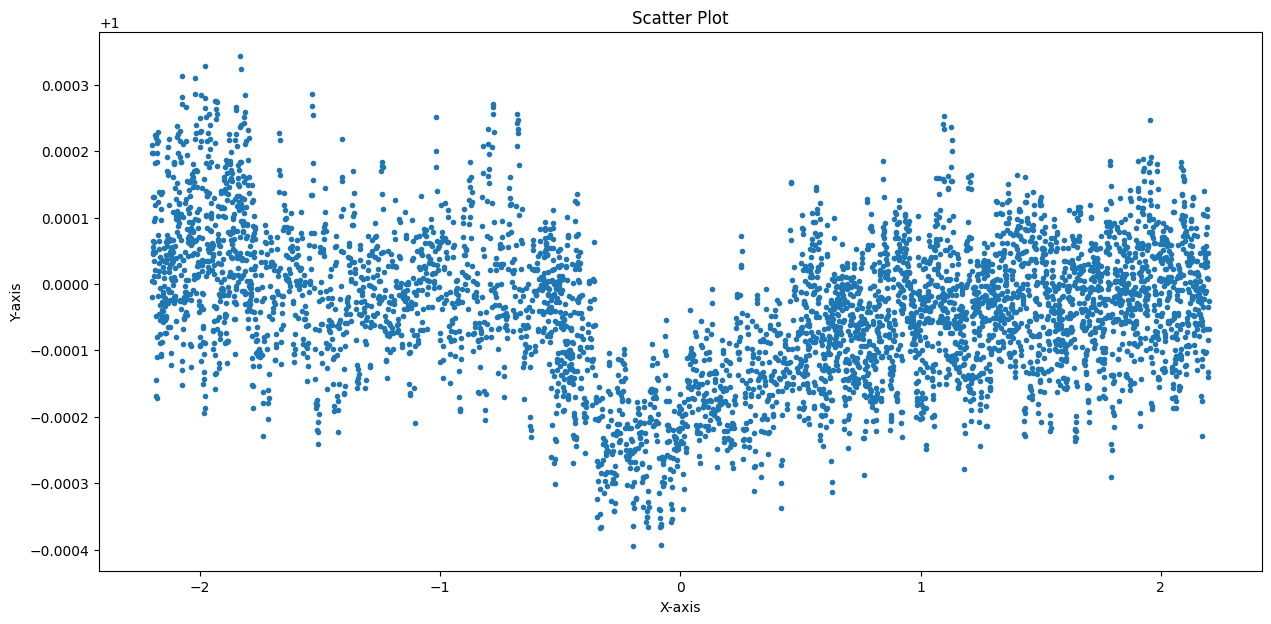

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [11]:
ID = 105999792
sectors = np.array([54, 55])
target = tr.target(ID=ID, sectors=sectors)

<ipython-input-12-0f6cd6f6076c>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_54, ap_55])


Sector 54


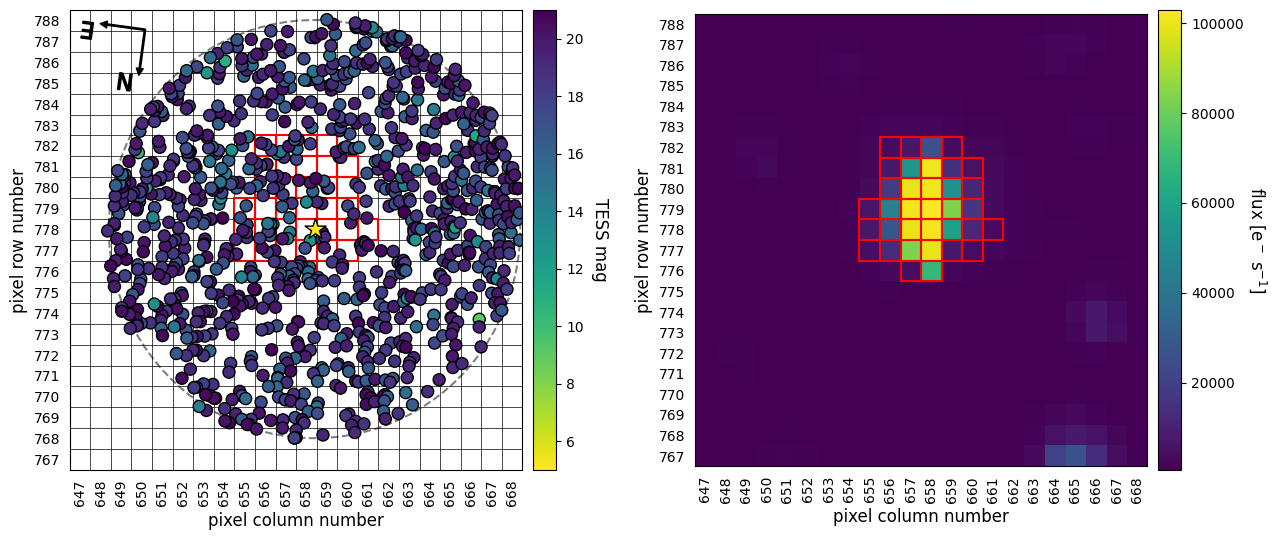

Sector 55


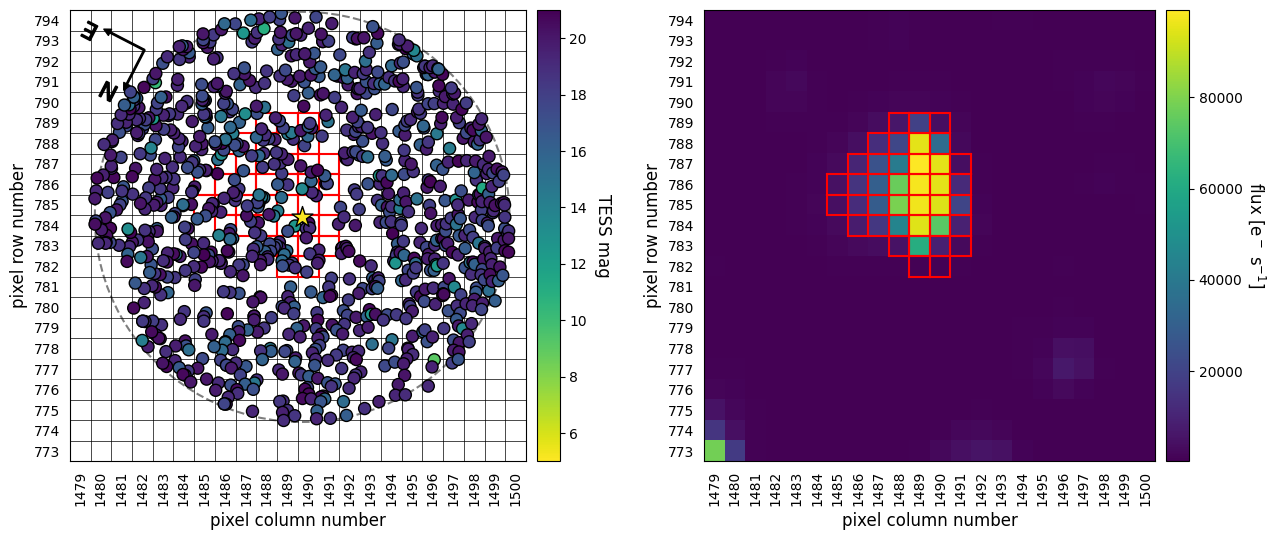

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,105999792,5.0823,4.554,4.239,4.076,300.905854,29.896804,0.98,1.16804,5549.0,62.444300,0.000,0.000
1,1963050932,20.3884,NaN,NaN,NaN,300.903218,29.897471,NaN,NaN,NaN,NaN,8.569,286.270
2,105999783,12.5132,10.083,9.308,9.111,300.906554,29.899961,NaN,18.83650,3991.0,0.433942,11.571,10.884
3,1963050934,18.6563,NaN,NaN,NaN,300.903144,29.899143,NaN,NaN,NaN,1.081970,11.933,314.879
4,1963050931,19.0231,NaN,NaN,NaN,300.902261,29.898578,NaN,NaN,NaN,0.253690,12.905,299.659
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,1963409429,19.0458,NaN,NaN,NaN,300.882594,29.949113,NaN,NaN,NaN,1.072820,201.813,338.930
966,1963049938,16.9481,NaN,NaN,NaN,300.913082,29.841061,NaN,NaN,NaN,0.696729,201.942,173.582
967,239481213,19.2169,16.167,15.345,14.648,300.870637,29.849672,NaN,NaN,NaN,NaN,202.179,212.948
968,1963409394,19.1536,NaN,NaN,NaN,300.847978,29.922060,NaN,NaN,NaN,0.024519,202.197,296.736


In [12]:
ap_54 = np.array([[655.0, 777.0], [655.0, 778.0], [655.0, 779.0], [656.0, 777.0], [
        656.0, 778.0], [656.0, 779.0], [656.0, 780.0], [656.0, 781.0], [656.0, 782.0],
      [657.0, 776.0], [657.0, 777.0], [657.0, 778.0], [657.0, 779.0], [657.0, 780.0],
      [657.0, 781.0], [657.0, 782.0], [658.0, 776.0], [658.0, 777.0], [658.0, 778.0],
      [658.0, 779.0], [658.0, 780.0], [658.0, 781.0], [658.0, 782.0], [659.0, 777.0],
      [659.0, 778.0], [659.0, 779.0], [659.0, 780.0], [659.0, 781.0], [659.0, 782.0],
      [660.0, 777.0], [660.0, 778.0], [660.0, 779.0], [660.0, 780.0], [660.0, 781.0],
      [661.0, 778.0]])
ap_55 = np.array([[1485.0, 785.0], [1485.0, 786.0], [1486.0, 784.0], [1486.0,
        785.0], [1486.0, 786.0], [1486.0, 787.0], [1487.0, 784.0], [1487.0, 785.0],
      [1487.0, 786.0], [1487.0, 787.0], [1487.0, 788.0], [1488.0, 783.0], [1488.0,
        784.0], [1488.0, 785.0], [1488.0, 786.0], [1488.0, 787.0], [1488.0, 788.0],
      [1488.0, 789.0], [1489.0, 782.0], [1489.0, 783.0], [1489.0, 784.0], [1489.0,
        785.0], [1489.0, 786.0], [1489.0, 787.0], [1489.0, 788.0], [1489.0, 789.0],
      [1490.0, 782.0], [1490.0, 783.0], [1490.0, 784.0], [1490.0, 785.0], [1490.0,
        786.0], [1490.0, 787.0], [1490.0, 788.0], [1490.0, 789.0], [1491.0, 783.0],
      [1491.0, 784.0], [1491.0, 785.0], [1491.0, 786.0], [1491.0, 787.0]])

apertures = np.array([ap_54, ap_55])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [14]:
tdepth = 0.207 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,105999792,5.0823,4.554,4.239,4.076,300.905854,29.896804,0.98,1.16804,5549.0,62.444300,0.000,0.000,9.958356e-01,0.000208
1,1963050932,20.3884,NaN,NaN,NaN,300.903218,29.897471,NaN,NaN,NaN,NaN,8.569,286.270,7.372647e-07,0.000000
2,105999783,12.5132,10.083,9.308,9.111,300.906554,29.899961,NaN,18.83650,3991.0,0.433942,11.571,10.884,1.047740e-03,0.197568
3,1963050934,18.6563,NaN,NaN,NaN,300.903144,29.899143,NaN,NaN,NaN,1.081970,11.933,314.879,3.589767e-06,0.000000
4,1963050931,19.0231,NaN,NaN,NaN,300.902261,29.898578,NaN,NaN,NaN,0.253690,12.905,299.659,2.546603e-06,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,1963409429,19.0458,NaN,NaN,NaN,300.882594,29.949113,NaN,NaN,NaN,1.072820,201.813,338.930,3.974696e-27,0.000000
966,1963049938,16.9481,NaN,NaN,NaN,300.913082,29.841061,NaN,NaN,NaN,0.696729,201.942,173.582,2.676504e-17,0.000000
967,239481213,19.2169,16.167,15.345,14.648,300.870637,29.849672,NaN,NaN,NaN,NaN,202.179,212.948,2.161964e-24,0.000000
968,1963409394,19.1536,NaN,NaN,NaN,300.847978,29.922060,NaN,NaN,NaN,0.024519,202.197,296.736,1.016710e-28,0.000000


In [15]:
%%time

# read in the light curve
lc = pd.read_csv("TIC_105999792_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = 26.2672427587845

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 105999792.
Calculating EB and EBx2P scenario probabilities for 105999792.
Calculating PTP scenario probability for 105999792.
Calculating PEB and PEBx2P scenario probabilities for 105999792.
Calculating STP scenario probability for 105999792.
Calculating SEB and SEBx2P scenario probabilities for 105999792.
Calculating DTP scenario probability for 105999792.
Calculating DEB and DEBx2P scenario probabilities for 105999792.
Calculating BTP scenario probability for 105999792.
Calculating BEB and BEBx2P scenario probabilities for 105999792.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 105999783.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 105999788.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 105999809.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 244281861.
CPU times: user 4min 53s, sys: 5.6 s, total: 4min 58s
Wall time: 3min 26s


In [16]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 1.0
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,105999792,TP,0.980000,1.168040,26.267243,89.943427,0.015131,0.681078,171.016236,1.873441,0.000000,0.000000,1.915870e-135
1,105999792,EB,0.980000,1.168040,26.267243,71.538483,1.017171,0.953285,356.780117,0.000000,0.166133,0.198102,0.000000e+00
2,105999792,EBx2P,0.980000,1.168040,52.534486,88.856103,0.325267,0.822746,162.039952,0.000000,0.977925,1.046965,0.000000e+00
3,105999792,PTP,0.980000,1.168040,26.267243,89.539774,0.069052,0.821361,166.132903,2.338901,0.000000,0.000000,8.611335e-33
4,105999792,PEB,0.980000,1.168040,26.267243,73.247649,0.908986,0.951868,359.078852,0.000000,0.139249,0.169834,0.000000e+00
5,105999792,PEBx2P,0.980000,1.168040,52.534486,88.516834,0.443487,0.781070,146.703517,0.000000,0.937339,0.988342,0.000000e+00
6,105999792,STP,0.667798,0.694711,26.267243,89.655489,0.067091,0.870819,179.120401,2.607200,0.000000,0.000000,3.812102e-162
7,105999792,SEB,0.399837,0.402089,26.267243,87.352176,1.142452,0.804956,7.020828,0.000000,0.180895,0.212339,0.000000e+00
8,105999792,SEBx2P,0.131870,0.161363,52.534486,89.793815,0.460892,0.690192,183.820647,0.000000,0.127653,0.156354,0.000000e+00
9,105999792,DTP,0.980000,1.168040,26.267243,89.950806,0.011305,0.740127,173.318366,1.592085,0.000000,0.000000,4.821452e-48


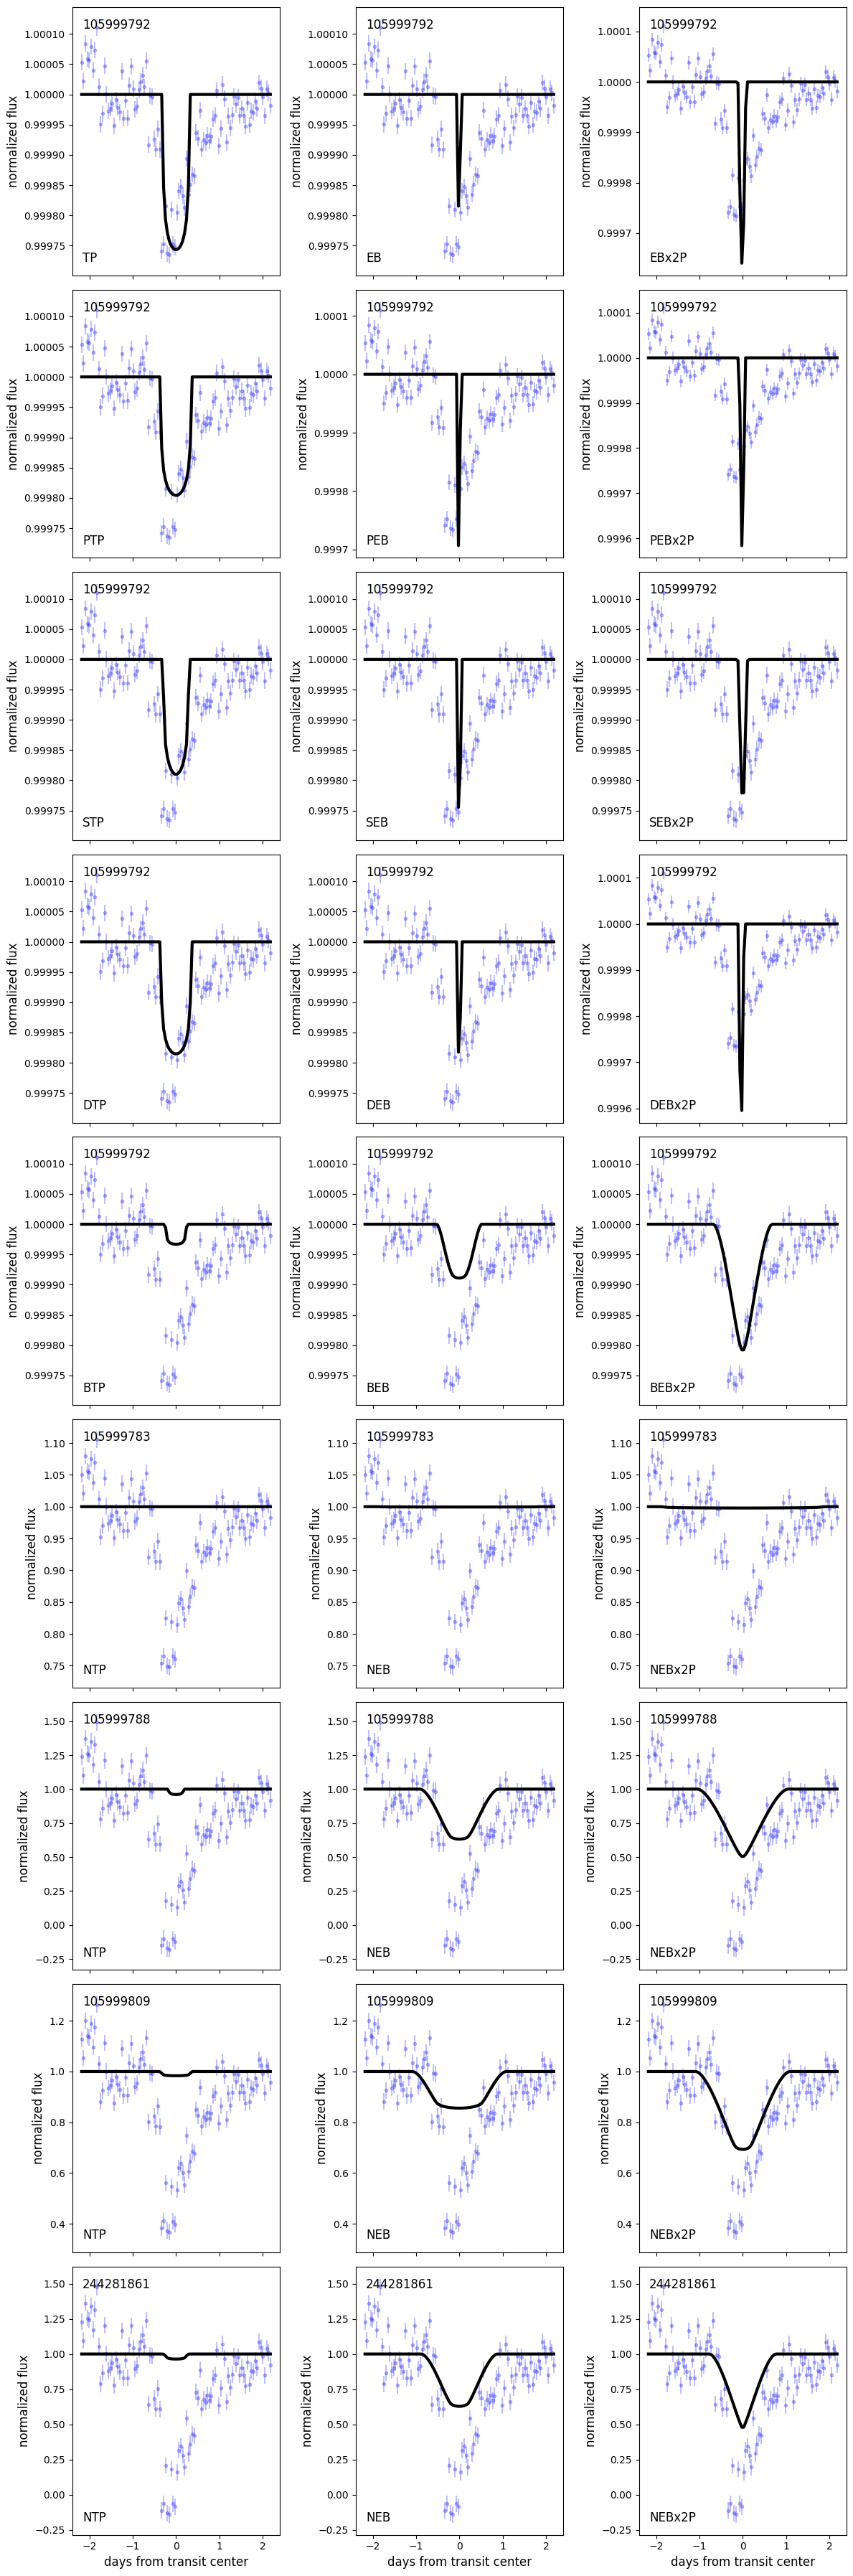

In [17]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [18]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.1499999601621495 +/- 0.3570713265940518
NFPP = 2.415885306376359e-14 +/- 1.0530493719075108e-13
CPU times: user 1h 30min 17s, sys: 1min 32s, total: 1h 31min 50s
Wall time: 1h 1min


Our final conclusion about this specified planet of TIC 105999792 is that it is most likely a planet (according to the range of FPP and NFPP set by TRICERATOPS).